# House Price Prediction using Linear Regression

## 1 Problem Statement

A US-based housing company, which uses data analytics to purchase houses below their actual values and flip them at higher prices, has collected a data set from the sale of houses in Australia. The goal of the analytics project is to build a regression model using regularization to:
- predict the actual values of prospective properties and decide whether to invest in them or not,
- identify the variables that are significant in predicting the price of a house, and
- determine the extent to which those variables influence the price of the house.

The model will be used to understand how house prices vary with associated variables and improve the strategy of the firm.

## 2 Approach to Analysis

Analysis is performed as per the following steps:
- Data Understanding & Cleaning
- Exploratory Data Analysis
- Data Preparation
- Model Building
- Model Evaluation
- Model Interpretation

## 3 Data Understanding

### 3.1 Data Loading & Inspection

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Loading the data and viewing
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Inspecting the shape of the data
df.shape

(1460, 81)

Since the number of observations is not much larger than the number of predictors, the variance of a linear regression fit is likely to be high.

In [4]:
# Inspecting data types and other meta-data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.2 Data Cleaning

#### 3.2.1 Checking and fixing header and footer rows

In [5]:
# Checking the header row
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Checking the footer row
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Since there are no anomalies in the header and footer rows, no changes are required.

#### 3.2.2 Checking and fixing duplicates

In [7]:
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Since there are no duplicate rows, no action is required.

#### 3.2.3 Treating missing values

In [8]:
# Calculating the percentage of missing values in each column
null_per = df.isnull().sum()/len(df)*100
null_per.sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [9]:
# Dropping columns with more than 45% missing values
cols_to_drop = null_per[null_per>45].index
cols_to_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [10]:
df = df.drop(columns=cols_to_drop)

In [11]:
df.shape

(1460, 76)

In [12]:
# Calculating the percentage of missing values in each column again
null_per = df.isnull().sum()/len(df)*100
null_per[null_per>0]

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

These missing values will be treated after a more thorough analysis of the data.

#### 3.2.4 Validating data

In [13]:
# Dropping 'Id' which is only an identifier
df = df.drop(columns='Id')

In [14]:
# Printing descriptive statistics of numeric variables to identify anomalies
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The descriptive statistics suggest the following changes:
1. Convert the dtype of 'MSSubClass' to 'category'
2. Treat missing values in 'LotFrontage', 'GarageYrBlt' and 'MasVnrArea'

In [15]:
# Changing the data type of 'MSSubClass' to 'category'
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MSSubClass'].dtype

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180,
                  190],
, ordered=False)

In [16]:
# Imputing median for missing values in 'LotFrontage', 'GarageYrBlt' and 'MasVnrArea'
for x in ['LotFrontage','GarageYrBlt','MasVnrArea']:
    m = df[x].median()
    df[x] = df[x].fillna(m)

In [17]:
# Calculating number of missing values in the 3 columns
df[['LotFrontage','GarageYrBlt','MasVnrArea']].isnull().sum()

LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

In [18]:
# Creating lists of numeric and categorical variables
num_vars = list(df.select_dtypes(include=['number']).columns)
cat_vars = list(df.select_dtypes(include=['object','category']).columns)

In [19]:
# Printing unique values of categorical variables to identify anomalies
for x in cat_vars:
    print(df[x].value_counts(normalize=True,dropna=False)*100,end='\n\n')

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

NAmes     

The above results suggest the following actions:
1. Address columns like 'Street', 'Utilities', 'LandSlope', 'RoofMatl' and 'Heating' having low variability using recursive feature elimination
2. Impute mode for missing values in 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2'
3. Impute mode for missing values in 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond'
4. Impute mode for missing values of 'MasVnrType' and 'Electrical'

In [20]:
# Imputing mode for missing values in 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1' and 'BsmtFinType2'
for x in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    m = df[x].mode()[0]
    df[x] = df[x].fillna(m)

In [21]:
# Imputing mode for missing values in 'GarageType','GarageFinish','GarageQual' and 'GarageCond'
for x in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    m = df[x].mode()[0]
    df[x] = df[x].fillna(m)

In [22]:
# Imputing mode for missing values in 'MasVnrType' and 'Electrical'
for x in ['MasVnrType','Electrical']:
    m = df[x].mode()[0]
    df[x] = df[x].fillna(m)

In [23]:
# Calculating the percentage of missing values in each column again
null_per = df.isnull().sum()/len(df)*100
null_per[null_per>0]

Series([], dtype: float64)

Thus, all missing values are treated and 100% of rows are retained.

In [24]:
# Printing all columns in the DataFrame after sorting to identify invalid data
for x in df.columns:
    print(df[x].sort_values(),end='\n\n')

1459     20
888      20
889      20
892      20
893      20
       ... 
520     190
1266    190
48      190
1062    190
861     190
Name: MSSubClass, Length: 1460, dtype: category
Categories (15, int64): [20, 30, 40, 45, ..., 120, 160, 180, 190]

916     C (all)
30      C (all)
93      C (all)
1279    C (all)
557     C (all)
         ...   
323          RM
1098         RM
1096         RM
329          RM
729          RM
Name: MSZoning, Length: 1460, dtype: object

227      21.0
1378     21.0
75       21.0
434      21.0
430      21.0
        ...  
197     174.0
231     174.0
1127    182.0
1298    313.0
934     313.0
Name: LotFrontage, Length: 1460, dtype: float64

956       1300
1039      1477
614       1491
489       1526
1449      1533
         ...  
451      70761
706     115149
249     159000
335     164660
313     215245
Name: LotArea, Length: 1460, dtype: int64

1184    Grvl
52      Grvl
335     Grvl
1061    Grvl
582     Grvl
        ... 
483     Pave
482     Pave
481     Pave
479 

No changes are required because the above result did not yield any anomalies.

#### 3.2.5 Adjusting data-types

In [25]:
df[cat_vars] = df[cat_vars].astype('category')
df.shape

(1460, 75)

## 4 Exploratory Data Analysis

### 4.1 Univariate Analysis

In [26]:
# Calculating descriptive statistics of numeric variables
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


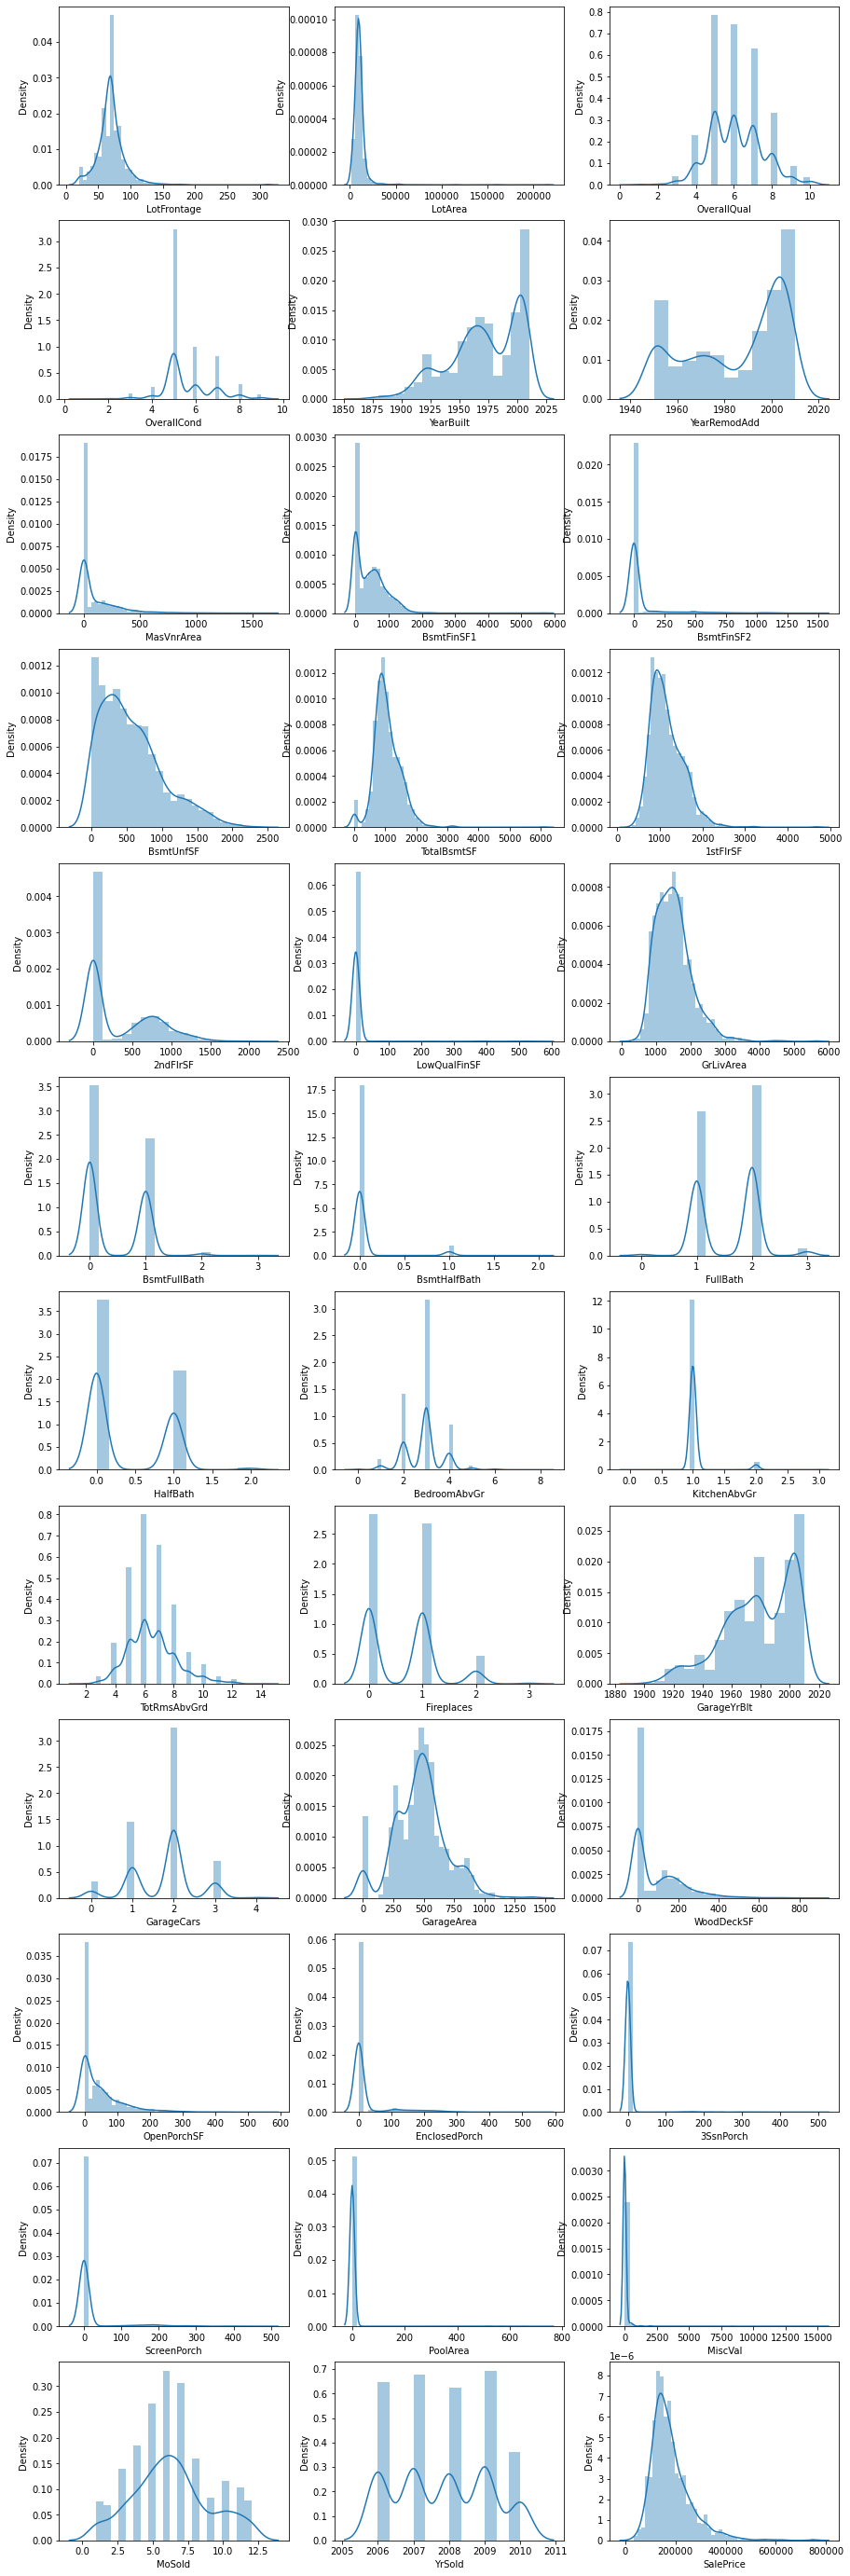

In [27]:
# Plotting distribution plots of numeric variables
fig,ax = plt.subplots(12,3,figsize=[15,50])
for i,x in enumerate(num_vars):
    sns.distplot(df[x],ax=ax[i//3,i%3])
fig.show()

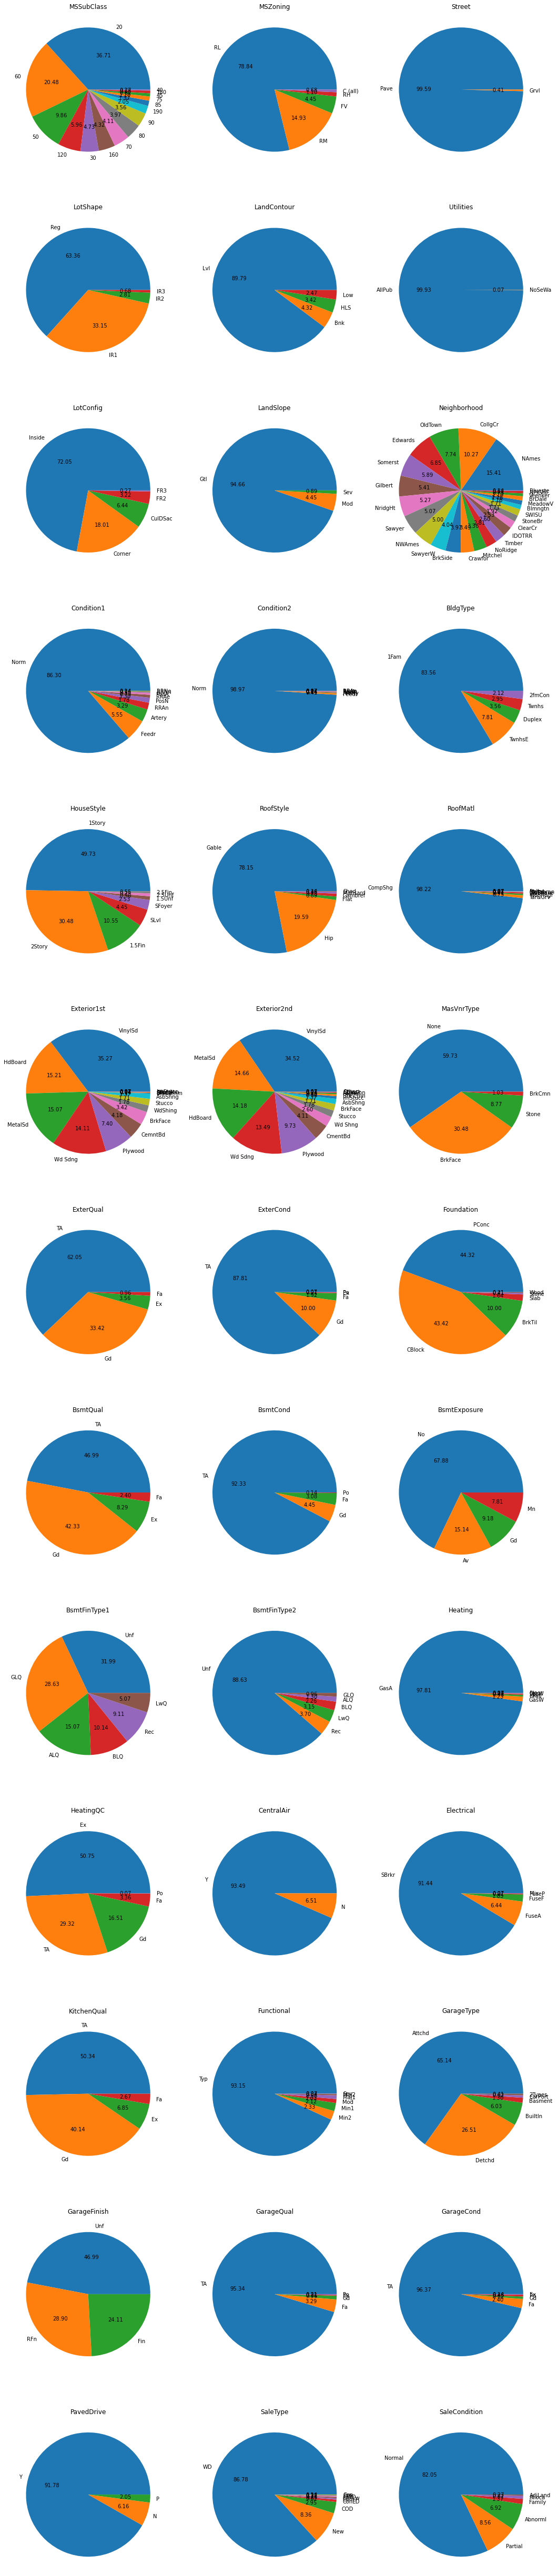

In [28]:
# Plotting pie charts of categorical variables
fig,ax = plt.subplots(13,3,figsize=[18,90])
for i,x in enumerate(cat_vars):
    data = df[x].value_counts()
    labels = data.index
    ax[i//3,i%3].set_title(x)
    ax[i//3,i%3].pie(data,labels=labels,autopct='%.2f')
fig.show()

**Insights**
1. Columns like 'Street', 'Utilities', 'LandSlope', 'RoofMatl' and 'Heating' have low variability and may have little predictive power
2. A number of variables like 'SalePrice','LotFrontage', 'LotArea', etc. are right skewed, indicating that higher priced homes may have different characteristics than average.

### 4.2 Bivariate Analysis

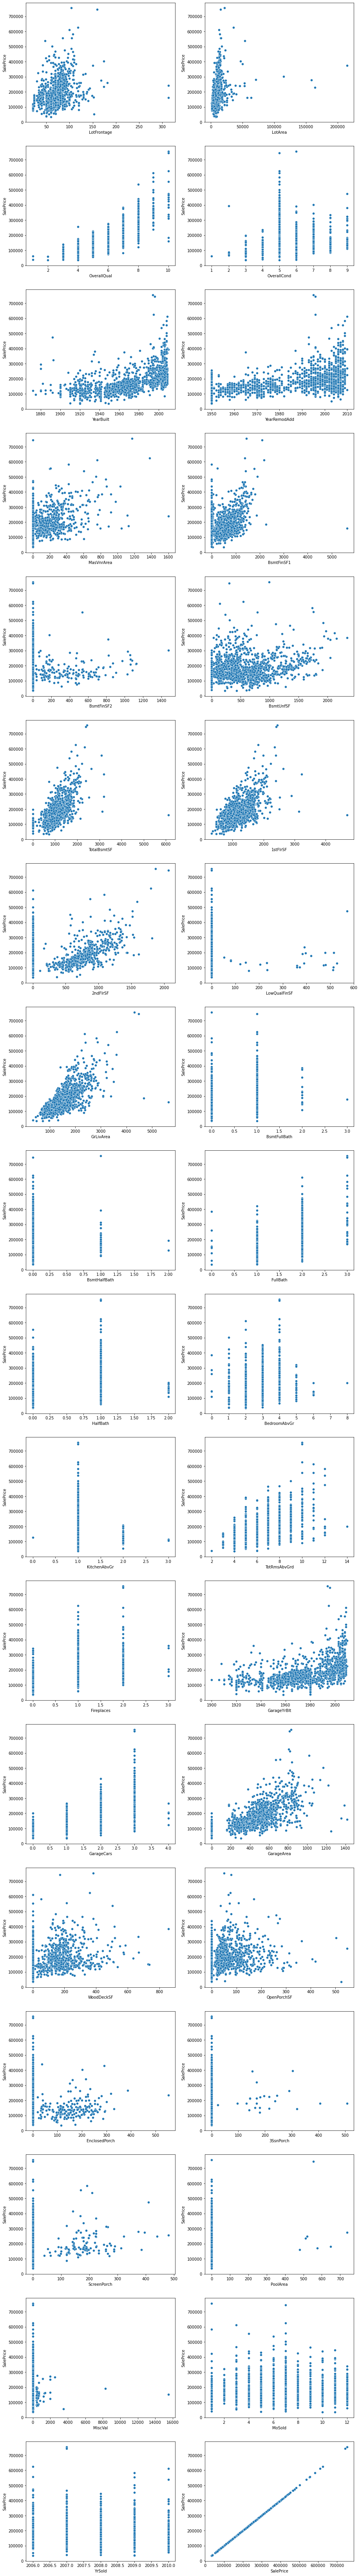

In [29]:
# Plotting scatter plots of 'SalePrice' against numeric variables
fig,ax = plt.subplots(18,2,figsize=[15,120])
for i,x in enumerate(num_vars):
    sns.scatterplot(x=df[x],y=df['SalePrice'],ax=ax[i//2,i%2])
fig.show()

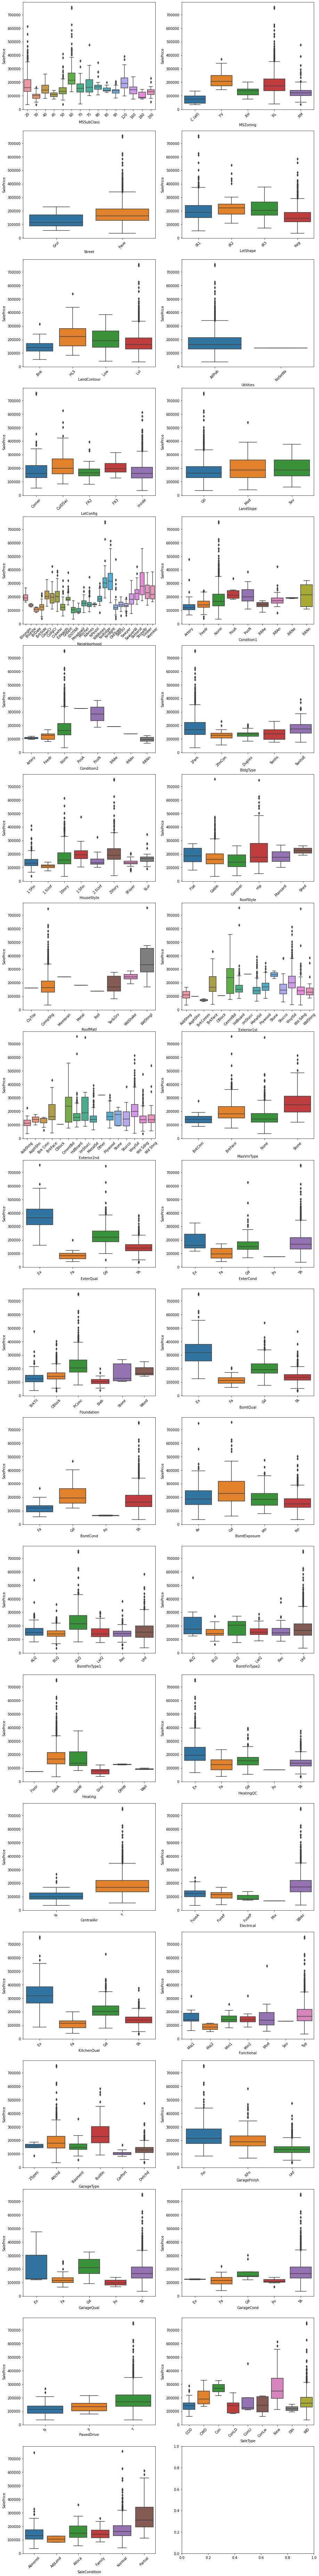

In [30]:
# Plotting box plots of categorical variables against 'SalePrice'
fig,ax = plt.subplots(20,2,figsize=[15,135])
for i,x in enumerate(cat_vars):
    sns.boxplot(data=df,x=df[x],y=df['SalePrice'],ax=ax[i//2,i%2])
    ax[i//2,i%2].tick_params(axis='x',labelrotation = 45)
fig.show()

**Insights**
1. The scatter plots show a linear association between 'SalePrice' and multiple independent varables such as 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', etc.
2. The box plots show that houses with higher prices have generally higher areas, quality, etc.

### 4.3 Correlation Matrix

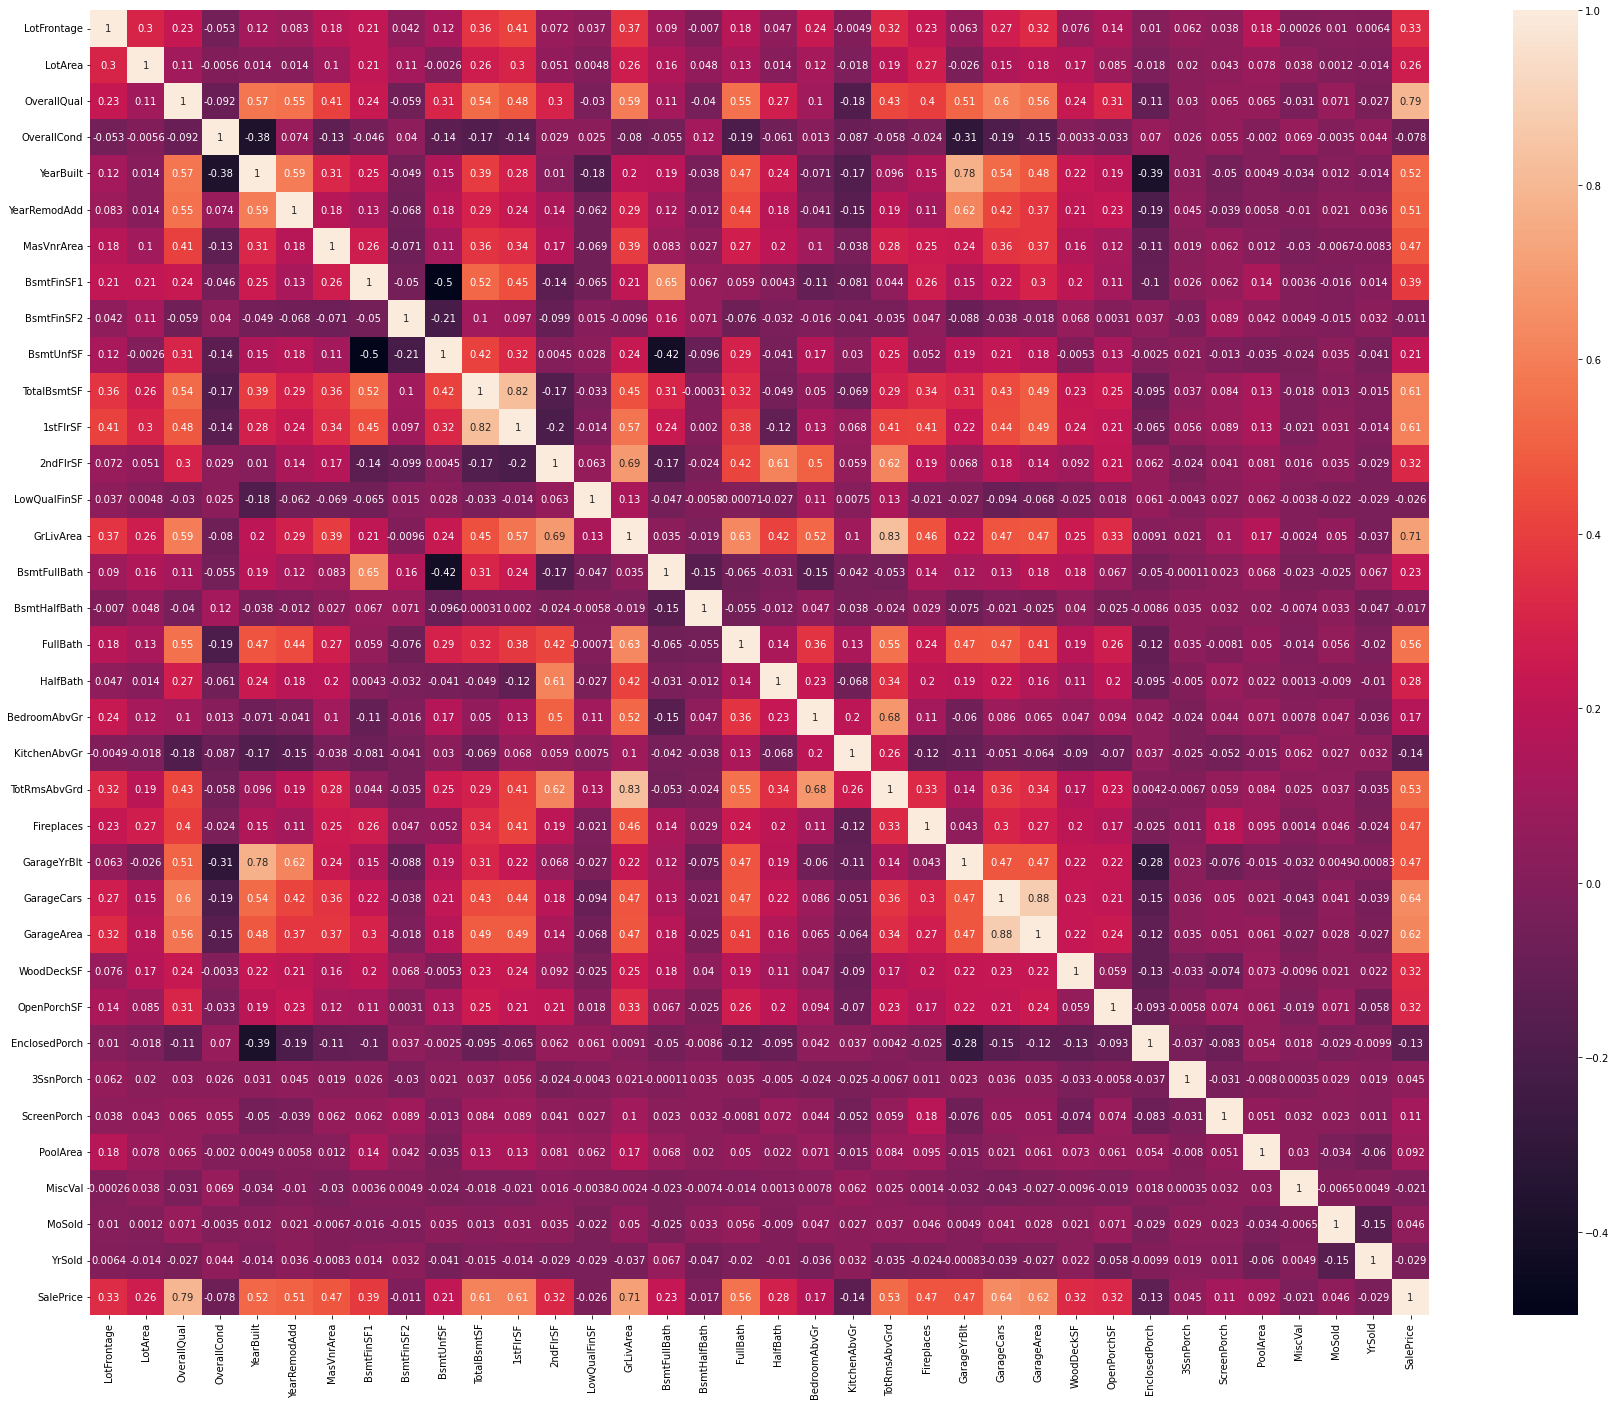

In [31]:
# Creating a correlation matrix
fig,ax = plt.subplots(figsize=[30,24])
sns.heatmap(df.corr(),annot=True,ax=ax)
fig.show()

In [32]:
# Dropping select variables to reduce collinearity between predictors
df.corr().unstack()[(df.corr().unstack()>=0.7) & (df.corr().unstack()!=1)].sort_values(ascending=False)

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
YearBuilt     GarageYrBlt     0.777182
GarageYrBlt   YearBuilt       0.777182
GrLivArea     SalePrice       0.708624
SalePrice     GrLivArea       0.708624
dtype: float64

In [33]:
df = df.drop(columns=['GarageCars','TotRmsAbvGrd','TotalBsmtSF','GarageYrBlt'])
df.shape

(1460, 71)

### 4.4 Distribution of the Response Variable

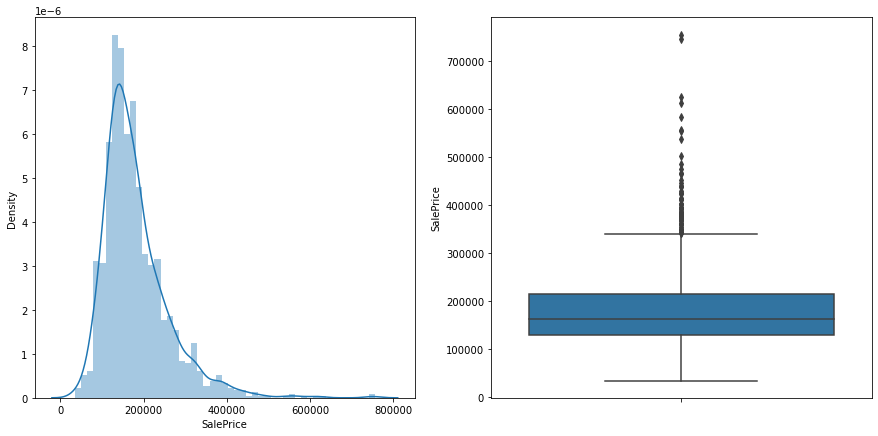

In [34]:
# Plotting a distribution plot and a box plot of the response variable
fig,ax = plt.subplots(1,2,figsize=[15,7])
sns.distplot(df['SalePrice'],ax=ax[0])
sns.boxplot(y=df['SalePrice'],ax=ax[1])
fig.show()

The above plots show significant outliers and deviation from normality, which may decrease R^2 and increase standard errors of linear regression models.

In [35]:
# Applying a log-transform to the response variable to suppress outliers and improve normality
df['SalePrice']=np.log(df['SalePrice'])

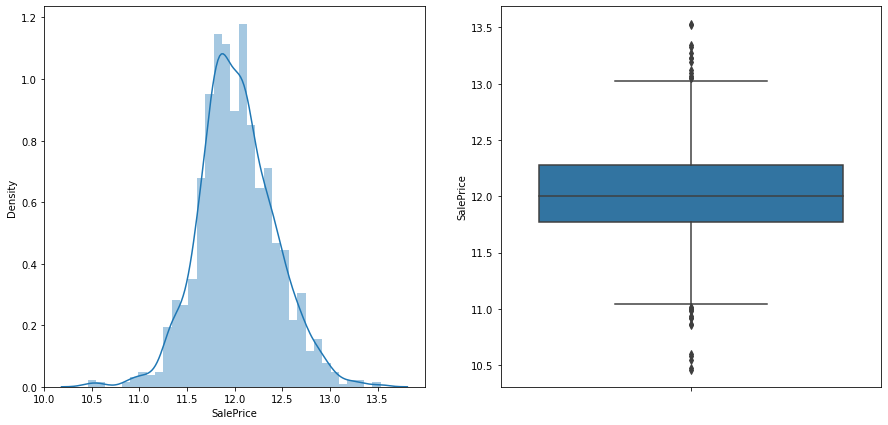

In [36]:
# Plotting a distribution plot and a box plot again
fig,ax = plt.subplots(1,2,figsize=[15,7])
sns.distplot(df['SalePrice'],ax=ax[0])
sns.boxplot(y=df['SalePrice'],ax=ax[1])
fig.show()

After transformation, outliers are suppressed and the response variable is approximately normally distributed.

## 5 Data Preparation

### 5.1 Encoding Dummy Variables

#### 5.1.1 Converting select categorical variables to ordinal variables by manual encoding (using the data dictionary)

In [37]:
# Checking the shape prior to encoding
df.shape

(1460, 71)

In [38]:
# Creatng mappings
map1 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
map2 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
map3 = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
map4 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
map5 = {'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}
map6 = {'Fin':3,'RFn':2,'Unf':1,'NA':0}

In [39]:
# Performing mappings
df['ExterQual'] = df['ExterQual'].map(map1)
df['ExterCond'] = df['ExterCond'].map(map1)

df['BsmtQual'] = df['BsmtQual'].map(map2)
df['BsmtCond'] = df['BsmtCond'].map(map2)

df['BsmtExposure'] = df['BsmtExposure'].map(map3)

df['BsmtFinType1'] = df['BsmtFinType1'].map(map4)
df['BsmtFinType2'] = df['BsmtFinType2'].map(map4)

df['HeatingQC'] = df['HeatingQC'].map(map1)
df['KitchenQual'] = df['KitchenQual'].map(map1)

df['Functional'] = df['Functional'].map(map5)

df['GarageFinish'] = df['GarageFinish'].map(map6)

df['GarageQual'] = df['GarageQual'].map(map2)
df['GarageCond'] = df['GarageCond'].map(map2)

In [40]:
# Printing unique values to verify mappings
l = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond']
for x in l:
    print(df[x].value_counts(),end='\n\n')

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

3    686
4    618
5    121
2     35
Name: BsmtQual, dtype: int64

3    1348
4      65
2      45
1       2
Name: BsmtCond, dtype: int64

1    991
3    221
4    134
2    114
Name: BsmtExposure, dtype: int64

1    467
6    418
5    220
4    148
3    133
2     74
Name: BsmtFinType1, dtype: int64

1    1294
3      54
2      46
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

8    1360
6      34
7      31
5      15
4      14
3       5
2       1
Name: Functional, dtype: int64

1    686
2    422
3    352
Name: GarageFinish, dtype: int64

3    1392
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

3    1407
2      35
4       9
1       7
5       2
Name: GarageCond, dtype:

In [41]:
# Converting data types of the above columns to 'int64'
df[l] = df[l].astype('int')
df[l].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ExterQual     1460 non-null   int64
 1   ExterCond     1460 non-null   int64
 2   BsmtQual      1460 non-null   int64
 3   BsmtCond      1460 non-null   int64
 4   BsmtExposure  1460 non-null   int64
 5   BsmtFinType1  1460 non-null   int64
 6   BsmtFinType2  1460 non-null   int64
 7   HeatingQC     1460 non-null   int64
 8   KitchenQual   1460 non-null   int64
 9   Functional    1460 non-null   int64
 10  GarageFinish  1460 non-null   int64
 11  GarageQual    1460 non-null   int64
 12  GarageCond    1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


#### 5.1.2 Performing one-hot encoding of the remaining categorical variables

In [42]:
df = pd.get_dummies(df,drop_first=True)

In [43]:
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,2,548,3,3,0,61,0,0,0,0,0,2,2008,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,5,1262,0,0,1262,0,1,2,0,3,1,3,8,1,2,460,3,3,298,0,0,0,0,0,0,5,2007,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,

### 5.2 Training and Testing Datasets

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)

### 5.3 Scaling Numeric Variables

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Obtaining numeric columns
num_vars = df_train.select_dtypes(exclude=['uint8']).columns

In [48]:
# Scaling the numeric variables in the train and test datasets
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [49]:
# Deriving the response and predictor variables from the training and test datasets
y_train = df_train.pop('SalePrice')
X_train = df_train

In [50]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## 6 Model Building

Linear regression is used to identify the variables that influence house prices in Australia.

### 6.1 Preliminary Multiple Linear Regression Model with All Variables

In [51]:
import statsmodels.api as sm

In [52]:
# Fitting the linear regression model using statsmodels
lr = sm.OLS(y_train,sm.add_constant(X_train)).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     89.12
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:59:31   Log-Likelihood:                 2228.2
No. Observations:                1021   AIC:                            -4060.
Df Residuals:                     823   BIC:                            -3085.
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3041      0.086    -15.148      0.000      -1.473      -1.135
LotFrontage               0.0515      0.021      2.419      0.016       0.010       0.093
LotArea                   0.1653      0.035      4.681      0.000       0.096       0.235
OverallQual               0.1062      0.015      7.099      0.000       0.077       0.136
OverallCond               0.0842      0.012      7.256      0.000       0.061       0.107
YearBuilt                 0.0791      0.019      4.232      0.000       0.042       0.116
YearRemodAdd              0.0189      0.005      3.585      0.000       0.009       0.029
MasVnrArea                0.0136      0.014      0.978      0.328      -0.014       0.041
ExterQual                 0.0087      0.010      0.846      0.398      -0.012       0.029
ExterCond                -0.0160      0.010     -1.561      0.119      -0.036       0.004
BsmtQual                  0.0087      0.009      0.999      0.318      -0.008       0.026
BsmtCond                  0.0079      0.012      0.651      0.515      -0.016       0.032
BsmtExposure              0.0149      0.004      3.638      0.000       0.007       0.023
BsmtFinType1              0.0056      0.004      1.376      0.169      -0.002       0.014
BsmtFinSF1                0.2812      0.040      7.089      0.000       0.203       0.359
BsmtFinType2             -0.0058      0.010     -0.590      0.555      -0.025       0.013
BsmtFinSF2                0.0519      0.018      2.937      0.003       0.017       0.087
BsmtUnfSF                 0.0709      0.014      4.908      0.000       0.043       0.099
HeatingQC                 0.0094      0.006      1.514      0.130      -0.003       0.021
1stFlrSF                  0.2024      0.020      9.957      0.000       0.163       0.242
2ndFlrSF                  0.0880      0.017      5.226      0.000       0.055       0.121
LowQualFinSF              0.0070      0.014      0.498      0.619      -0.021       0.035
GrLivArea                 0.2202      0.016     13.983      0.000       0.189       0.251
BsmtFullBath              0.0254      0.009      2.772      0.006       0.007       0.043
BsmtHalfBath              0.0050      0.010      0.517      0.605      -0.014       0.024
FullBath                  0.0136      0.011      1.293      0.196      -0.007       0.034
HalfBath                  0.0102      0.007      1.482      0.139      -0.003       0.024
BedroomAbvGr              0.0034      0.017      0.206      0.837      -0.029       0.036
KitchenAbvGr             -0.0365      0.020     -1.786      0.074      -0.077       0.004
KitchenQual               0.0138      0.008      1.731      0.084      -0.002       0.029
Functional                0.0649      0.012      5.636      0.000       0.042       0.088
Fireplaces             

The model has an F-statistic of 89.12 with a p-value of 0.00. This indicates that at least some of the variables are linearly associated with the response.

### 6.2 RFECV for Variable Selection

Recursive feature elimination with cross-validation is used to identify the optimal number of variables in the model.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [54]:
# Instantiating and fitting RFECV
lr = LinearRegression()
rfecv = RFECV(lr,scoring='r2')
rfecv.fit(X_train,y_train)

RFECV(estimator=LinearRegression(), scoring='r2')

In [55]:
# Viewing the results of RFECV
cv_results = pd.DataFrame(rfecv.cv_results_)
cv_results

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,6.060488e-01,9.145386e-02,6.644235e-01,6.401479e-01,6.080025e-01,4.307987e-01,6.868713e-01
1,6.114894e-01,9.414244e-02,6.611169e-01,6.703034e-01,6.084870e-01,4.306599e-01,6.868798e-01
2,6.092293e-01,9.341605e-02,6.611600e-01,6.608737e-01,6.069020e-01,4.298850e-01,6.873257e-01
3,5.769834e-01,1.046400e-01,6.613860e-01,5.321400e-01,6.069103e-01,3.968045e-01,6.876761e-01
4,5.688297e-01,1.184680e-01,6.614932e-01,5.302258e-01,6.068824e-01,3.578399e-01,6.877070e-01
...,...,...,...,...,...,...,...
200,-1.107579e+20,1.203062e+20,-1.180825e+06,-2.137014e+20,-4.458560e+19,-2.933319e+20,-2.170652e+18
201,-2.233939e+20,2.588695e+20,-3.323633e+08,-6.551899e+20,-6.763557e+19,-3.882108e+20,-5.933029e+18
202,-5.037256e+20,8.332524e+20,-5.999031e+11,-2.161635e+21,-1.336643e+20,-2.229663e+20,-3.626456e+17
203,-1.897894e+20,3.433875e+20,-3.700609e+09,-8.760258e+20,-2.503908e+19,-3.943653e+19,-8.445461e+18


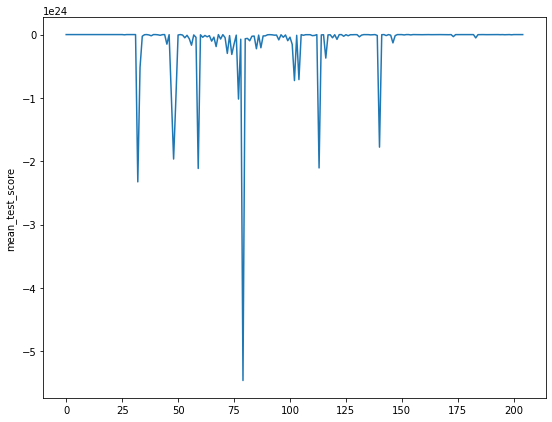

In [56]:
# Plotting 'mean_test_score' against the number of predictors
fig,ax = plt.subplots(figsize=[9,7])
sns.lineplot(x=cv_results.index,y=cv_results['mean_test_score'])
fig.show()

The above chart is very hard to read because of the very high variability of 'mean_test_score'.

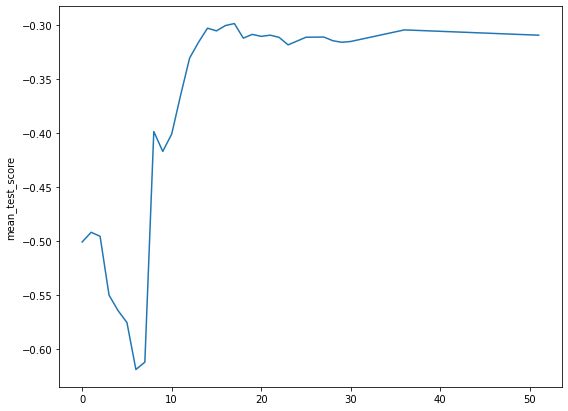

In [57]:
# Plotting log(mean_test_score) against the number of predictors to make the chart readable
fig,ax = plt.subplots(figsize=[9,7])
sns.lineplot(x=cv_results.index,y=np.log(cv_results['mean_test_score']))
fig.show()

In [58]:
# Identifying the optimal number of features in the model
rfecv.n_features_

18

In [60]:
cv_results.loc[0:50,:]

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,6.060488e-01,9.145386e-02,0.664424,6.401479e-01,0.608003,0.430799,0.686871
1,6.114894e-01,9.414244e-02,0.661117,6.703034e-01,0.608487,0.430660,0.686880
2,6.092293e-01,9.341605e-02,0.661160,6.608737e-01,0.606902,0.429885,0.687326
3,5.769834e-01,1.046400e-01,0.661386,5.321400e-01,0.606910,0.396805,0.687676
4,5.688297e-01,1.184680e-01,0.661493,5.302258e-01,0.606882,0.357840,0.687707
5,5.625293e-01,1.265708e-01,0.661518,5.194120e-01,0.606845,0.337135,0.687736
6,5.386510e-01,1.812090e-01,0.661532,5.730891e-01,0.581583,0.187523,0.689528
7,5.423284e-01,1.926677e-01,0.661244,5.946727e-01,0.601913,0.163725,0.690087
8,6.711687e-01,9.311336e-02,0.758252,5.943358e-01,0.674342,0.542466,0.786448
9,6.589429e-01,1.259179e-01,0.759849,5.953893e-01,0.704162,0.445028,0.790286


In [61]:
# Filtering out the top 30 features
features = X_train.columns[rfecv.ranking_<=(30-18+1)]
len(features)

30

Although the optimal number of features given by RFECV is 18, we will use 30 because RFECV gives the best model for prediction, but many more are actually likely to influence price.

The high variability of the R^2 score corresponding to 30 features in cv_results indicates that the variance of the model is high.

### 6.3 Multipe Linear Regression Model with 30 Variables

In [62]:
# Fitting the linear regression model using statsmodels
lr = sm.OLS(y_train,sm.add_constant(X_train[features])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     365.0
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:00:09   Log-Likelihood:                 1913.8
No. Observations:                1021   AIC:                            -3766.
Df Residuals:                     990   BIC:                            -3613.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2753      0.050    -25.762      0.000      -1.372      -1.178
LotFrontage             0.0641      0.020      3.236      0.001       0.025       0.103
LotArea                 0.1457      0.028      5.271      0.000       0.091       0.200
OverallQual             0.2138      0.013     16.059      0.000       0.188       0.240
OverallCond             0.1180      0.010     11.678      0.000       0.098       0.138
YearBuilt               0.1339      0.009     15.614      0.000       0.117       0.151
BsmtFinSF1              0.3508      0.031     11.229      0.000       0.289       0.412
BsmtFinSF2              0.0545      0.013      4.312      0.000       0.030       0.079
BsmtUnfSF               0.0745      0.013      5.921      0.000       0.050       0.099
1stFlrSF                0.0692      0.027      2.595      0.010       0.017       0.122
GrLivArea               0.5163      0.018     28.276      0.000       0.480       0.552
KitchenAbvGr           -0.0836      0.012     -6.976      0.000      -0.107      -0.060
Functional              0.0714      0.012      5.938      0.000       0.048       0.095
GarageArea              0.0939      0.011      8.781      0.000       0.073       0.115
MSSubClass_75          -0.0554      0.020     -2.749      0.006      -0.095      -0.016
MSZoning_FV             0.1562      0.016      9.556      0.000       0.124       0.188
MSZoning_RH             0.1402      0.018      7.663      0.000       0.104       0.176
MSZoning_RL             0.1428      0.015      9.429      0.000       0.113       0.172
MSZoning_RM             0.1228      0.015      8.031      0.000       0.093       0.153
Condition2_PosN        -0.6206      0.039    -15.916      0.000      -0.697      -0.544
Condition2_RRAe        -0.1521      0.058     -2.609      0.009      -0.266      -0.038
HouseStyle_2.5Unf       0.0732      0.022      3.256      0.001       0.029       0.117
RoofStyle_Shed          0.1183      0.044      2.688      0.007       0.032       0.205
RoofMatl_CompShg        1.0780      0.044     24.469      0.000       0.992       1.164
RoofMatl_Membran        1.1852      0.059     20.009      0.000       1.069       1.301
RoofMatl_Metal          1.1402      0.058     19.615      0.000       1.026       1.254
RoofMatl_Roll           1.0783      0.058     18.593      0.000       0.965       1.192
RoofMatl_Tar&Grv        1.1011      0.047     23.496      0.000       1.009       1.193
RoofMatl_WdShake        1.0079      0.049     20.449      0.000       0.911       1.105
RoofMatl_WdShngl        1.0924      0.047     23.117      0.000       1.000       1.185
Exterior1st_BrkComm    -0.1035      0.028     -3.667      0.000      -0.159      -0.048
==============================================================================
Omnibus:    

The above linear regression model with 30 variables has a training R^2 score of about 0.92 and a cross-validation R^2 score of about 0.73 (section 6.2) indicating overfitting. We will use regularization to resolve both overfitting and the high variance of the cross_validation R^2 score.

### 6.4 Ridge Regression Model (l2 regularization)

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [64]:
# Building a Ridge regression model by tuning alpha using cross-validation
ridge = Ridge(random_state=100)
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

ridge_gridsearch = GridSearchCV(ridge,params)
ridge_gridsearch.fit(X_train[features],y_train)

GridSearchCV(estimator=Ridge(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]})

In [65]:
# Printing the results
cv_results = pd.DataFrame(ridge_gridsearch.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048587,0.091278,0.002334,0.001004,0.0001,{'alpha': 0.0001},0.892725,0.562275,0.787686,0.467684,0.924228,0.726920,0.181343,6
1,0.002272,0.000156,0.001443,0.000016,0.001,{'alpha': 0.001},0.892679,0.562435,0.788020,0.474385,0.924237,0.728351,0.179423,5
2,0.002612,0.000619,0.001843,0.000673,0.01,{'alpha': 0.01},0.892108,0.564019,0.790844,0.533173,0.924036,0.740836,0.163300,4
3,0.002379,0.000438,0.001521,0.000063,0.1,{'alpha': 0.1},0.885251,0.578215,0.800489,0.765620,0.915515,0.789018,0.118642,2
4,0.002506,0.000220,0.001685,0.000124,1,{'alpha': 1},0.869293,0.646114,0.805777,0.878154,0.888096,0.817487,0.090394,1
5,0.002491,0.000140,0.001640,0.000146,10,{'alpha': 10},0.809895,0.712793,0.764814,0.837412,0.819810,0.788945,0.044993,3
6,0.002395,0.000170,0.001511,0.000054,100,{'alpha': 100},0.500251,0.477151,0.473266,0.496609,0.478605,0.485176,0.011022,7
7,0.002515,0.000466,0.001879,0.000631,1000,{'alpha': 1000},0.115935,0.110031,0.109282,0.107179,0.100875,0.108660,0.004858,8
8,0.002401,0.000145,0.001545,0.000125,10000,{'alpha': 10000},0.006755,0.006107,0.012979,0.004157,0.004496,0.006899,0.003191,9


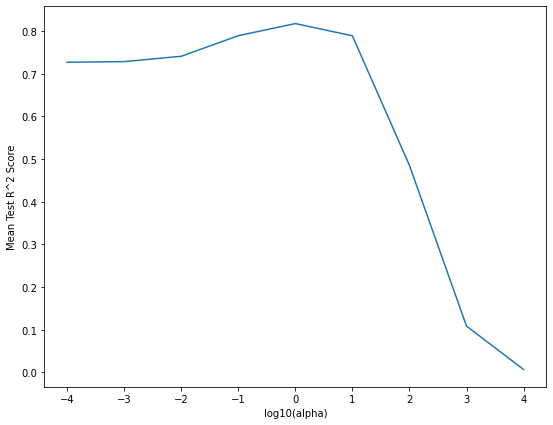

In [66]:
# Plotting 'Mean Test R^2 Score' against log(alpha)
fig,ax = plt.subplots(figsize=[9,7])
ax.plot(np.log10(cv_results['param_alpha'].astype('float')),cv_results['mean_test_score'])
ax.set_ylabel('Mean Test R^2 Score')
ax.set_xlabel('log10(alpha)')
fig.show()

The above chart indicates that the optimal value of alpha is between 0.01 and 10.

In [67]:
# Performing additional tuning using cross-validation
ridge = Ridge(random_state=100)
params = {'alpha':[0.1,0.2,0.4,0.8,1,2,4,8,10]}

ridge_gridsearch = GridSearchCV(ridge,params)
ridge_gridsearch.fit(X_train[features],y_train)

GridSearchCV(estimator=Ridge(random_state=100),
             param_grid={'alpha': [0.1, 0.2, 0.4, 0.8, 1, 2, 4, 8, 10]})

In [68]:
# Printing the results
cv_results = pd.DataFrame(ridge_gridsearch.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003515,0.000292,0.002434,0.000514,0.1,{'alpha': 0.1},0.885251,0.578215,0.800489,0.765620,0.915515,0.789018,0.118642,8
1,0.002914,0.000104,0.002120,0.000249,0.2,{'alpha': 0.2},0.880638,0.591146,0.803264,0.826933,0.908274,0.802051,0.111858,6
2,0.003764,0.000700,0.002333,0.000358,0.4,{'alpha': 0.4},0.875881,0.610933,0.805445,0.861006,0.899941,0.810641,0.104573,5
3,0.003515,0.000733,0.002539,0.000582,0.8,{'alpha': 0.8},0.871060,0.636917,0.806118,0.875871,0.891128,0.816219,0.094264,3
4,0.002639,0.000248,0.001730,0.000159,1,{'alpha': 1},0.869293,0.646114,0.805777,0.878154,0.888096,0.817487,0.090394,2
5,0.002515,0.000255,0.001799,0.000462,2,{'alpha': 2},0.861830,0.675016,0.802267,0.879788,0.877161,0.819212,0.077361,1
6,0.002400,0.000175,0.001649,0.000096,4,{'alpha': 4},0.848233,0.700147,0.793404,0.872356,0.861125,0.815053,0.063528,4
7,0.002231,0.000084,0.001518,0.000038,8,{'alpha': 8},0.822298,0.713207,0.774484,0.849713,0.833149,0.798570,0.049480,7
8,0.002347,0.000142,0.001555,0.000105,10,{'alpha': 10},0.809895,0.712793,0.764814,0.837412,0.819810,0.788945,0.044993,9


**The optimal value of alpha for the Ridge regression model is about 2**.

The comparatively low variance of R^2 of the best estimator at index 5 in cv_results indicates that the ridge regression model is more stable and generalizable than the model in 6.3.

### 6.5 Lasso Regression Model (l1 regularization)

In [69]:
from sklearn.linear_model import Lasso

In [70]:
# Building the Lasso regression model by tuning alpha using cross-validation
lasso = Lasso(random_state=100)
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

lasso_gridsearch = GridSearchCV(lasso,params)
lasso_gridsearch.fit(X_train[features],y_train)

GridSearchCV(estimator=Lasso(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]})

In [71]:
# Printing the results
cv_results = pd.DataFrame(lasso_gridsearch.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026258,0.040280,0.002029,0.000667,0.0001,{'alpha': 0.0001},0.878924,0.601084,7.967939e-01,0.843306,0.890894,0.802201,0.105754,2
1,0.002491,0.000018,0.001413,0.000027,0.001,{'alpha': 0.001},0.835788,0.737061,7.809503e-01,0.838603,0.839774,0.806435,0.041159,1
2,0.002426,0.000029,0.001472,0.000100,0.01,{'alpha': 0.01},0.462520,0.421743,4.290921e-01,0.466028,0.414508,0.438778,0.021351,3
3,0.002350,0.000026,0.001415,0.000041,0.1,{'alpha': 0.1},-0.008156,-0.008018,-1.846927e-08,-0.009789,-0.008408,-0.006874,0.003494,4
4,0.002360,0.000041,0.001403,0.000011,1,{'alpha': 1},-0.008156,-0.008018,-1.846927e-08,-0.009789,-0.008408,-0.006874,0.003494,4
5,0.002346,0.000026,0.001475,0.000057,10,{'alpha': 10},-0.008156,-0.008018,-1.846927e-08,-0.009789,-0.008408,-0.006874,0.003494,4
6,0.002376,0.000116,0.001423,0.000021,100,{'alpha': 100},-0.008156,-0.008018,-1.846927e-08,-0.009789,-0.008408,-0.006874,0.003494,4
7,0.002413,0.000089,0.001452,0.000117,1000,{'alpha': 1000},-0.008156,-0.008018,-1.846927e-08,-0.009789,-0.008408,-0.006874,0.003494,4
8,0.002309,0.000006,0.001433,0.000014,10000,{'alpha': 10000},-0.008156,-0.008018,-1.846927e-08,-0.009789,-0.008408,-0.006874,0.003494,4


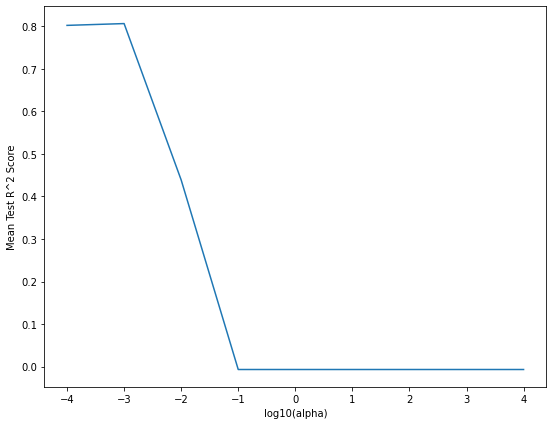

In [72]:
# Plotting 'Mean Test R^2 Score' against log(alpha)
fig,ax = plt.subplots(figsize=[9,7])
ax.plot(np.log10(cv_results['param_alpha'].astype('float')),cv_results['mean_test_score'])
ax.set_ylabel('Mean Test R^2 Score')
ax.set_xlabel('log10(alpha)')
fig.show()

The above chart indicates that the optimal value of alpha is between 0.0001 and 0.001.

In [73]:
# Performing additional tuning using cross-validation
lasso = Lasso(random_state=100)
params = {'alpha':[0.0001,0.0002,0.0004,0.0008,0.001]}

lasso_gridsearch = GridSearchCV(lasso,params)
lasso_gridsearch.fit(X_train[features],y_train)

GridSearchCV(estimator=Lasso(random_state=100),
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0008, 0.001]})

In [74]:
# Printing the results
cv_results = pd.DataFrame(lasso_gridsearch.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007423,0.001907,0.002007,0.000128,0.0001,{'alpha': 0.0001},0.878924,0.601084,0.796794,0.843306,0.890894,0.802201,0.105754,5
1,0.004831,0.002110,0.002246,0.000693,0.0002,{'alpha': 0.0002},0.870961,0.637737,0.799194,0.879680,0.881775,0.813870,0.093209,2
2,0.003156,0.000224,0.001734,0.000191,0.0004,{'alpha': 0.0004},0.859979,0.689450,0.797229,0.870036,0.868829,0.817105,0.069291,1
3,0.002863,0.000038,0.001603,0.000077,0.0008,{'alpha': 0.0008},0.842138,0.728239,0.785976,0.847065,0.848229,0.810330,0.047180,3
4,0.002582,0.000121,0.001563,0.000148,0.001,{'alpha': 0.001},0.835788,0.737061,0.780950,0.838603,0.839774,0.806435,0.041159,4


**The optimal value of alpha for the Lasso regression model is about 0.004**.

The comparatively low variance of R^2 of the best estimator at index 2 in cv_results indicates that the lasso regression model is more stable and generalizable than both the multiple linear regression model in 6.3 and the ridge regression model in 6.4, although the latter has higher predictive power.

## 7 Model Evaluation

### 7.1 Multipe Linear Regression Model with 30 Variables

In [75]:
# Printing the results of linear regression
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     365.0
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:00:50   Log-Likelihood:                 1913.8
No. Observations:                1021   AIC:                            -3766.
Df Residuals:                     990   BIC:                            -3613.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2753      0.050    -25.762      0.000      -1.372      -1.178
LotFrontage             0.0641      0.020      3.236      0.001       0.025       0.103
LotArea                 0.1457      0.028      5.271      0.000       0.091       0.200
OverallQual             0.2138      0.013     16.059      0.000       0.188       0.240
OverallCond             0.1180      0.010     11.678      0.000       0.098       0.138
YearBuilt               0.1339      0.009     15.614      0.000       0.117       0.151
BsmtFinSF1              0.3508      0.031     11.229      0.000       0.289       0.412
BsmtFinSF2              0.0545      0.013      4.312      0.000       0.030       0.079
BsmtUnfSF               0.0745      0.013      5.921      0.000       0.050       0.099
1stFlrSF                0.0692      0.027      2.595      0.010       0.017       0.122
GrLivArea               0.5163      0.018     28.276      0.000       0.480       0.552
KitchenAbvGr           -0.0836      0.012     -6.976      0.000      -0.107      -0.060
Functional              0.0714      0.012      5.938      0.000       0.048       0.095
GarageArea              0.0939      0.011      8.781      0.000       0.073       0.115
MSSubClass_75          -0.0554      0.020     -2.749      0.006      -0.095      -0.016
MSZoning_FV             0.1562      0.016      9.556      0.000       0.124       0.188
MSZoning_RH             0.1402      0.018      7.663      0.000       0.104       0.176
MSZoning_RL             0.1428      0.015      9.429      0.000       0.113       0.172
MSZoning_RM             0.1228      0.015      8.031      0.000       0.093       0.153
Condition2_PosN        -0.6206      0.039    -15.916      0.000      -0.697      -0.544
Condition2_RRAe        -0.1521      0.058     -2.609      0.009      -0.266      -0.038
HouseStyle_2.5Unf       0.0732      0.022      3.256      0.001       0.029       0.117
RoofStyle_Shed          0.1183      0.044      2.688      0.007       0.032       0.205
RoofMatl_CompShg        1.0780      0.044     24.469      0.000       0.992       1.164
RoofMatl_Membran        1.1852      0.059     20.009      0.000       1.069       1.301
RoofMatl_Metal          1.1402      0.058     19.615      0.000       1.026       1.254
RoofMatl_Roll           1.0783      0.058     18.593      0.000       0.965       1.192
RoofMatl_Tar&Grv        1.1011      0.047     23.496      0.000       1.009       1.193
RoofMatl_WdShake        1.0079      0.049     20.449      0.000       0.911       1.105
RoofMatl_WdShngl        1.0924      0.047     23.117      0.000       1.000       1.185
Exterior1st_BrkComm    -0.1035      0.028     -3.667      0.000      -0.159      -0.048
==============================================================================
Omnibus:    

In [76]:
lr_results = pd.DataFrame(lr.params)
lr_results.reset_index(inplace=True)
lr_results.rename(columns={'index':'Predictor',0:'MLR Coefficient'},inplace=True)

In [77]:
# Printing the coefficients of the multiple linear regression model
lr_results

,Predictor,MLR Coefficient
0,const,-1.275276
1,LotFrontage,0.064078
2,LotArea,0.145675
3,OverallQual,0.213836
4,OverallCond,0.118025
5,YearBuilt,0.133879
6,BsmtFinSF1,0.350758
7,BsmtFinSF2,0.054501
8,BsmtUnfSF,0.074481
9,1stFlrSF,0.069237


In [78]:
# Importing libraries for scoring models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [79]:
# Preparing y_train_pred and y_test_pred
y_train_pred = lr.predict(sm.add_constant(X_train[features]))
y_test_pred = lr.predict(sm.add_constant(X_test[features]))

In [80]:
# Creating a DataFrame with training and test r2_score and mean_squared_error
lr_scores = pd.DataFrame({'Metric':['Training R^2 score','Test R^2 score','Training MSE','Test MSE'],
 'MLR':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred),mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]
})

In [81]:
lr_scores

,Metric,MLR
0,Training R^2 score,0.917092
1,Test R^2 score,0.839921
2,Training MSE,0.001379
3,Test MSE,0.002792


### 7.2 Ridge Regression Model

In [81]:
# Printing coefficients of the Ridge Regression Model
ridge = ridge_gridsearch.best_estimator_

In [82]:
ridge_results = pd.DataFrame({'Predictor':np.hstack((np.array('Const'),ridge.feature_names_in_)),
                              'Ridge Coefficient':np.hstack((np.array(ridge.intercept_),ridge.coef_))})

In [83]:
ridge_results

,Predictor,Ridge Coefficient
0,Const,-0.121706
1,LotFrontage,0.001386
2,LotArea,0.089549
3,OverallQual,0.281841
4,OverallCond,0.107045
5,YearBuilt,0.129952
6,BsmtFinSF1,0.102536
7,BsmtFinSF2,0.031371
8,BsmtUnfSF,0.015669
9,1stFlrSF,0.119318


In [84]:
# Calculating training and test r2_score and mean_squared_error
y_train_pred = ridge.predict(X_train[features])
y_test_pred = ridge.predict(X_test[features])

ridge_scores = pd.DataFrame({'Metric':['Training R^2 score','Test R^2 score','Training MSE','Test MSE'],
 'Ridge':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred),mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]
})

In [85]:
ridge_scores

,Metric,Ridge
0,Training R^2 score,0.856429
1,Test R^2 score,0.861327
2,Training MSE,0.002387
3,Test MSE,0.002418


### 7.3 Lasso Regression Model

In [86]:
# Printing coefficients of the Lasso Regression Model
lasso = lasso_gridsearch.best_estimator_

In [87]:
lasso_results = pd.DataFrame({'Predictor':np.hstack((np.array('Const'),lasso.feature_names_in_)),
                              'Lasso Coefficient':np.hstack((np.array(lasso.intercept_),lasso.coef_))})

In [88]:
lasso_results

,Predictor,Lasso Coefficient
0,Const,0.004569
1,LotFrontage,0.000000
2,LotArea,0.000000
3,OverallQual,0.313672
4,OverallCond,0.099272
5,YearBuilt,0.127440
6,BsmtFinSF1,0.054670
7,BsmtFinSF2,0.004124
8,BsmtUnfSF,-0.000000
9,1stFlrSF,0.089430


In [89]:
# Calculating training and test r2_score and mean_squared_error
y_train_pred = lasso.predict(X_train[features])
y_test_pred = lasso.predict(X_test[features])

lasso_scores = pd.DataFrame({'Metric':['Training R^2 score','Test R^2 score','Training MSE','Test MSE'],
 'Lasso':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred),mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]
})

In [90]:
lasso_scores

,Metric,Lasso
0,Training R^2 score,0.836460
1,Test R^2 score,0.856155
2,Training MSE,0.002719
3,Test MSE,0.002509


### 7.4 Summary of Results

In [91]:
# Comparing coefficients of all models
results = lr_results.copy()
results['Ridge Coefficient'] = ridge_results['Ridge Coefficient']
results['Lasso Coefficient'] = lasso_results['Lasso Coefficient']

In [92]:
results

,Predictor,MLR Coefficient,Ridge Coefficient,Lasso Coefficient
0,const,-1.275276,-0.121706,0.004569
1,LotFrontage,0.064078,0.001386,0.000000
2,LotArea,0.145675,0.089549,0.000000
3,OverallQual,0.213836,0.281841,0.313672
4,OverallCond,0.118025,0.107045,0.099272
5,YearBuilt,0.133879,0.129952,0.127440
6,BsmtFinSF1,0.350758,0.102536,0.054670
7,BsmtFinSF2,0.054501,0.031371,0.004124
8,BsmtUnfSF,0.074481,0.015669,-0.000000
9,1stFlrSF,0.069237,0.119318,0.089430


In [93]:
# Comparing training and test R^2 scores and MSEs of all models
scores = lr_scores.copy()
scores['Ridge'] = ridge_scores['Ridge']
scores['Lasso'] = lasso_scores['Lasso']

In [94]:
scores

,Metric,MLR,Ridge,Lasso
0,Training R^2 score,0.917092,0.856429,0.836460
1,Test R^2 score,0.839921,0.861327,0.856155
2,Training MSE,0.001379,0.002387,0.002719
3,Test MSE,0.002792,0.002418,0.002509


The scores indicate that both the Ridge and Lasso regression models are more stable and generalizable than the multiple linear regression model.

## 8 Model Interpretation

We will use the Lasso regression model because its R^2 score and MSE are on par with those of the Ridge regression model, but it has fewer variables.

In [95]:
# Calculating absolute values of coefficients
lasso_results['|Lasso Coefficient|'] = abs(lasso_results['Lasso Coefficient'])
lasso_results.sort_values(by='|Lasso Coefficient|',ascending=False)

,Predictor,Lasso Coefficient,|Lasso Coefficient|
10,GrLivArea,0.358186,0.358186
3,OverallQual,0.313672,0.313672
5,YearBuilt,0.127440,0.127440
13,GarageArea,0.110939,0.110939
4,OverallCond,0.099272,0.099272
9,1stFlrSF,0.089430,0.089430
6,BsmtFinSF1,0.054670,0.054670
17,MSZoning_RL,0.037007,0.037007
19,Condition2_PosN,-0.035822,0.035822
11,KitchenAbvGr,-0.024463,0.024463


The top 10 variables that influence house prices are as follows:
- GrLivArea: Price increases when GrLivArea increases
- OverallQual: Price increases when OverallQual increases
- YearBuilt: Price is higher for newer buildings
- GarageArea: Price increases with GarageArea
- OverallCond: Price increases as the overall condition improves
- 1stFlrSF: Price increases when 1stFlrSF increases
- BsmtFinSF1: Price is higher when BsmtFinSF1 is higher
- MSZoning: Price is higher when MSZoning takes the value RL (Residential Low Density)
- Condition2: Price is lower when Condition2 takes the value PosN
- KitchenAbvGr: Price decreases as KitchenAbvGr increases

## 9 Calculations for Subjective Questions

### 9.1 Question 1

#### 9.1.1 Ridge Regression Model for Alpha = 4

In [96]:
# Fitting a Ridge regression model for alpha = 4
ridge2 = Ridge(alpha=4,random_state=100)
ridge2.fit(X_train[features],y_train)

Ridge(alpha=4, random_state=100)

In [97]:
# Calculating coefficients
ridge2_results = pd.DataFrame(
    {'Predictor':np.hstack((np.array('Const'),ridge2.feature_names_in_)),
                              'Ridge2 Coefficient':np.hstack((np.array(ridge2.intercept_),ridge2.coef_))})

In [98]:
ridge2_results['|Ridge2 Coefficient|'] = abs(ridge2_results['Ridge2 Coefficient'])
ridge2_results.sort_values(by='|Ridge2 Coefficient|',ascending=False)

,Predictor,Ridge2 Coefficient,|Ridge2 Coefficient|
3,OverallQual,0.277002,0.277002
10,GrLivArea,0.276978,0.276978
5,YearBuilt,0.128402,0.128402
13,GarageArea,0.126881,0.126881
9,1stFlrSF,0.116271,0.116271
4,OverallCond,0.097475,0.097475
6,BsmtFinSF1,0.089240,0.089240
19,Condition2_PosN,-0.084326,0.084326
2,LotArea,0.066271,0.066271
17,MSZoning_RL,0.055317,0.055317


In [99]:
# Calculating training and test r2_score and mean_squared_error
y_train_pred = ridge2.predict(X_train[features])
y_test_pred = ridge2.predict(X_test[features])

ridge2_scores = pd.DataFrame({'Metric':['Training R^2 score','Test R^2 score','Training MSE','Test MSE'],
 'Ridge2':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred),mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]
})

In [100]:
ridge2_scores

,Metric,Ridge2
0,Training R^2 score,0.842981
1,Test R^2 score,0.848442
2,Training MSE,0.002611
3,Test MSE,0.002643


#### 9.1.2 Lasso Regression Model for Alpha = 0.0008

In [101]:
# Fitting a Lasso regression model for alpha = 0.0008
lasso2 = Lasso(alpha=0.0008,random_state=100)
lasso2.fit(X_train[features],y_train)

Lasso(alpha=0.0008, random_state=100)

In [102]:
# Calculating coefficients
lasso2_results = pd.DataFrame({'Predictor':np.hstack((np.array('Const'),lasso2.feature_names_in_)),
                              'Lasso2 Coefficient':np.hstack((np.array(lasso2.intercept_),lasso2.coef_))})
lasso2_results['|Lasso2 Coefficient|'] = abs(lasso2_results['Lasso2 Coefficient'])

In [103]:
lasso2_results.sort_values(by='|Lasso2 Coefficient|',ascending=False)

,Predictor,Lasso2 Coefficient,|Lasso2 Coefficient|
3,OverallQual,0.337074,0.337074
10,GrLivArea,0.315076,0.315076
5,YearBuilt,0.118812,0.118812
13,GarageArea,0.116014,0.116014
4,OverallCond,0.071840,0.071840
0,Const,0.055977,0.055977
9,1stFlrSF,0.055071,0.055071
17,MSZoning_RL,0.027469,0.027469
6,BsmtFinSF1,0.014812,0.014812
18,MSZoning_RM,-0.012565,0.012565


In [104]:
# Calculating training and test r2_score and mean_squared_error
y_train_pred = lasso2.predict(X_train[features])
y_test_pred = lasso2.predict(X_test[features])

lasso2_scores = pd.DataFrame({'Metric':['Training R^2 score','Test R^2 score','Training MSE','Test MSE'],
 'Lasso2':[r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred),mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)]
})

In [105]:
lasso2_scores

,Metric,Lasso2
0,Training R^2 score,0.821692
1,Test R^2 score,0.836113
2,Training MSE,0.002965
3,Test MSE,0.002858


### 9.2 Question 3

Finding the 5 most important predictor variables after dropping the top 5 variables from the Lasso regression model with alpha = 0.0004

In [106]:
# Dropping the top 5 variables from the Lasso regression model
new_features = features.drop(['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea', 'OverallCond'])

In [107]:
# Instantiating and fitting the new lasso regression model
lasso3 = Lasso(alpha=0.0004,random_state=100)
lasso3.fit(X_train[new_features],y_train)

Lasso(alpha=0.0004, random_state=100)

In [108]:
# Calculating absolute values of coefficients
lasso3_results = pd.DataFrame({'Predictor':np.hstack((np.array('Const'),lasso3.feature_names_in_)),
                              'Lasso3 Coefficient':np.hstack((np.array(lasso3.intercept_),lasso3.coef_))})
lasso3_results['|Lasso3 Coefficient|'] = abs(lasso3_results['Lasso3 Coefficient'])

In [109]:
lasso3_results.sort_values(by='|Lasso3 Coefficient|',ascending=False)

,Predictor,Lasso3 Coefficient,|Lasso3 Coefficient|
6,1stFlrSF,0.584448,0.584448
3,BsmtFinSF1,0.247707,0.247707
0,Const,0.191422,0.191422
7,KitchenAbvGr,-0.144834,0.144834
10,MSZoning_FV,0.134904,0.134904
8,Functional,0.114928,0.114928
5,BsmtUnfSF,0.098011,0.098011
12,MSZoning_RL,0.063075,0.063075
25,Exterior1st_BrkComm,-0.028611,0.028611
9,MSSubClass_75,0.017528,0.017528
